# Data Analysis with Python : Cain Seriph

# 1. Project Overview 


## Objective: Review manager salary responses to observe what effects variables have on compensation.
- Which industry pays the most?
- How does salary increase given years of experience?
- How do salaries compare for the same role in different locations?
- How much do salaries differ by gender and years of experience?
- How do factors like race and education level correlate with salary?


## Data Source: Data sourced from https://www.askamanager.org in 2021 
## "Ask A Manager Salary Survey 2021"

In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Collection and Loading 

In [2]:
# Import Salary CSV
df = pd.read_csv("Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.csv")
df.shape

(28102, 18)

## 3. Data Cleaning and Preparation 

In [3]:
# Filter for USD currency only
df = df[df["Please indicate the currency"] == "USD"]
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
5,4/27/2021 11:02:46,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White


In [4]:
# Drop multiple unused columns
df = df.drop(df.columns[[0, 3, 4, 6, 7, 8, 9, 10, 13]], axis=1)
df.head()


,How old are you?,What industry do you work in?,"What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,25-34,Education (Higher Education),"55,000",Massachusetts,Boston,5-7 years,Master's degree,Woman,White
2,25-34,"Accounting, Banking & Finance","34,000",Tennessee,Chattanooga,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,"62,000",Wisconsin,Milwaukee,5-7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance","60,000",South Carolina,Greenville,5-7 years,College degree,Woman,White
5,25-34,Education (Higher Education),"62,000",New Hampshire,Hanover,2 - 4 years,Master's degree,Man,White


In [5]:
# Rename columns remaining
df.columns = ['Age', 'Industry', 'Salary', 'State', 'City', 'Years', 'Education', 'Gender', 'Race']
df.head()

,Age,Industry,Salary,State,City,Years,Education,Gender,Race
0,25-34,Education (Higher Education),"55,000",Massachusetts,Boston,5-7 years,Master's degree,Woman,White
2,25-34,"Accounting, Banking & Finance","34,000",Tennessee,Chattanooga,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,"62,000",Wisconsin,Milwaukee,5-7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance","60,000",South Carolina,Greenville,5-7 years,College degree,Woman,White
5,25-34,Education (Higher Education),"62,000",New Hampshire,Hanover,2 - 4 years,Master's degree,Man,White


- Handle Missing Values

In [6]:
# Remove rows with NaN values
df = df.dropna()

In [7]:
# Tidy up Years column
df['Years'] = df['Years'].replace('years', '', regex=True)
df['Years'] = df['Years'].replace('year or less', '', regex=True)
df.head()

,Age,Industry,Salary,State,City,Years,Education,Gender,Race
0,25-34,Education (Higher Education),"55,000",Massachusetts,Boston,5-7,Master's degree,Woman,White
2,25-34,"Accounting, Banking & Finance","34,000",Tennessee,Chattanooga,2 - 4,College degree,Woman,White
3,25-34,Nonprofits,"62,000",Wisconsin,Milwaukee,5-7,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance","60,000",South Carolina,Greenville,5-7,College degree,Woman,White
5,25-34,Education (Higher Education),"62,000",New Hampshire,Hanover,2 - 4,Master's degree,Man,White


- Feature Engineering:

In [8]:
# Combine state and city into region
df["Region"] = df["State"].fillna("") + ", " + df["City"].fillna("")
df["Region"] = df["Region"].str.strip(", ")
df.head()

,Age,Industry,Salary,State,City,Years,Education,Gender,Race,Region
0,25-34,Education (Higher Education),"55,000",Massachusetts,Boston,5-7,Master's degree,Woman,White,"Massachusetts, Boston"
2,25-34,"Accounting, Banking & Finance","34,000",Tennessee,Chattanooga,2 - 4,College degree,Woman,White,"Tennessee, Chattanooga"
3,25-34,Nonprofits,"62,000",Wisconsin,Milwaukee,5-7,College degree,Woman,White,"Wisconsin, Milwaukee"
4,25-34,"Accounting, Banking & Finance","60,000",South Carolina,Greenville,5-7,College degree,Woman,White,"South Carolina, Greenville"
5,25-34,Education (Higher Education),"62,000",New Hampshire,Hanover,2 - 4,Master's degree,Man,White,"New Hampshire, Hanover"


- Data Type Adjustment

In [9]:
# Clean and convert Salary column
df["Salary"] = df["Salary"].str.replace(',', '')
df["Salary"] = pd.to_numeric(df["Salary"], errors="coerce")  # Convert to numeric, coercing errors
df["Salary"] = df["Salary"].fillna(0).astype('int')  # Fill NaN with 0 and convert to int

## 4. Exploratory Data Analysis (EDA)

- Data Visualizations

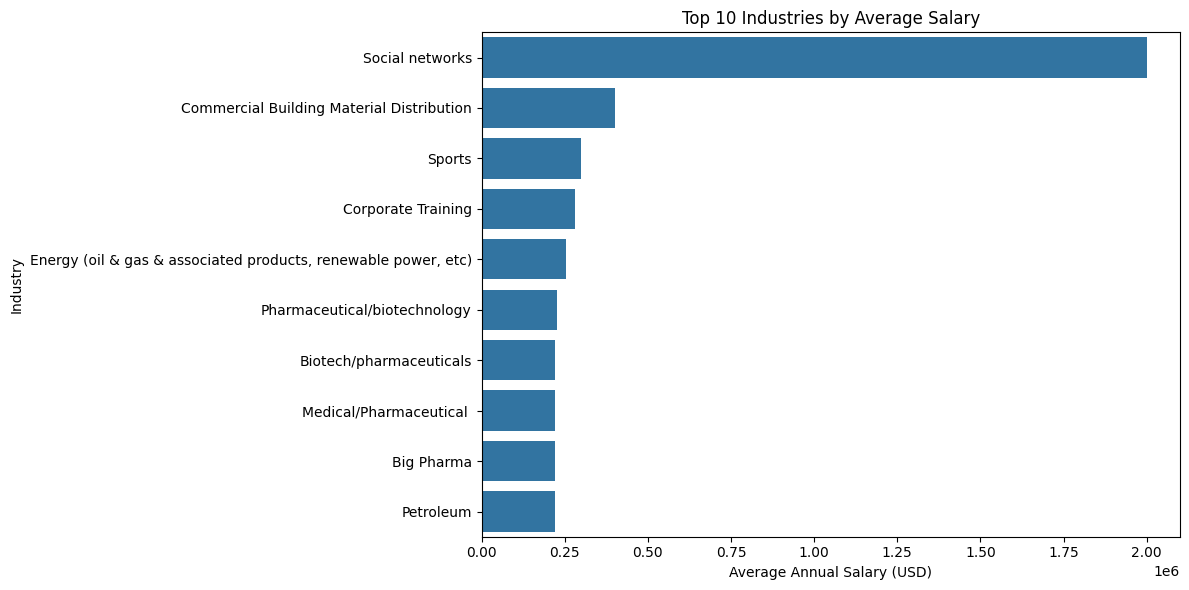

In [10]:
# 1. Industry Analysis
plt.figure(figsize=(12, 6))
industry_salary = (
    df.groupby("Industry")["Salary"].mean().sort_values(ascending=False).head(10)
)
sns.barplot(x=industry_salary.values, y=industry_salary.index)
plt.title("Top 10 Industries by Average Salary")
plt.xlabel("Average Annual Salary (USD)")
plt.tight_layout()
plt.show()


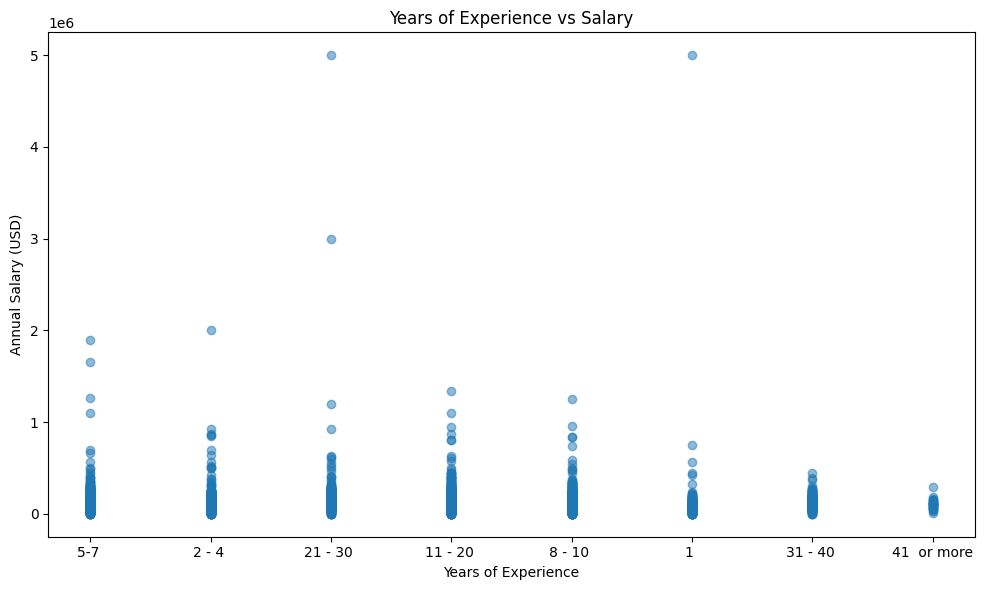

In [11]:
# 2. Experience vs Salary
plt.figure(figsize=(10, 6))
plt.scatter(df["Years"], df["Salary"], alpha=0.5)
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Annual Salary (USD)")
plt.tight_layout()
plt.show()


In [12]:
# Displaying a Series from the DataFrame
series_state = df['State']
print(series_state)

0           Massachusetts
2               Tennessee
3               Wisconsin
4          South Carolina
5           New Hampshire
               ...       
28092           Tennessee
28095           Tennessee
28097           Tennessee
28099    Florida, Georgia
28101            New York
Name: State, Length: 22595, dtype: object


In [13]:
# Check the datatype of each column
column_datatypes = df.dtypes
print(column_datatypes)

Age          object
Industry     object
Salary        int64
State        object
City         object
Years        object
Education    object
Gender       object
Race         object
Region       object
dtype: object


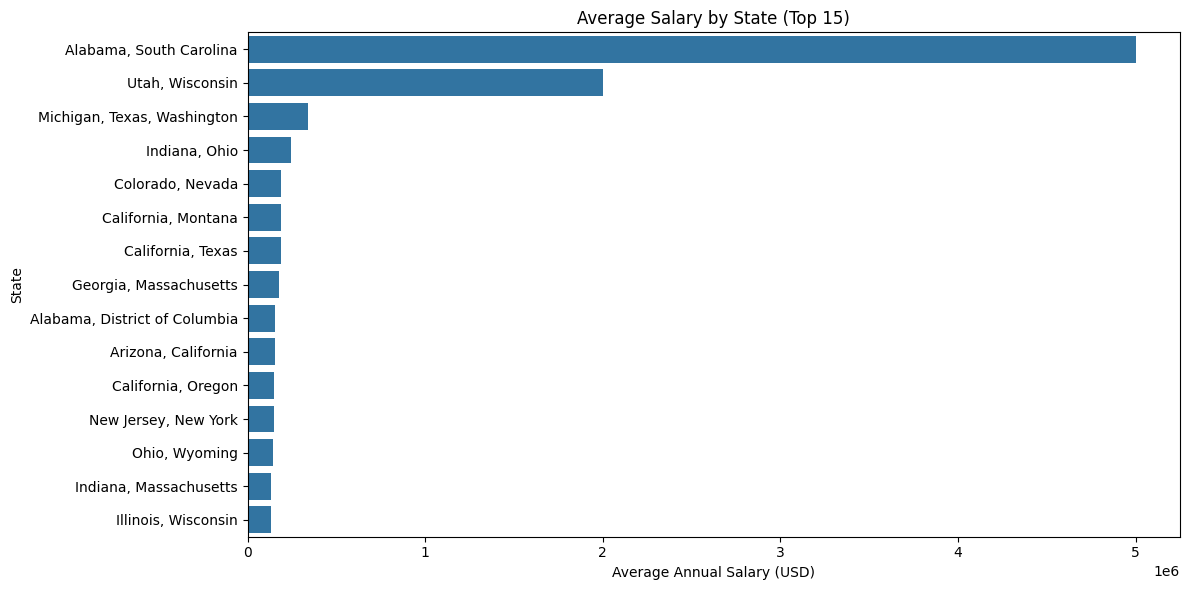

In [14]:
# 3. Salary by Location (Top 15 states)
plt.figure(figsize=(12, 6))
location_salary = (
    df.groupby("State")["Salary"].mean().sort_values(ascending=False).head(15)
)
sns.barplot(x=location_salary.values, y=location_salary.index)
plt.title("Average Salary by State (Top 15)")
plt.xlabel("Average Annual Salary (USD)")
plt.tight_layout()
plt.show()

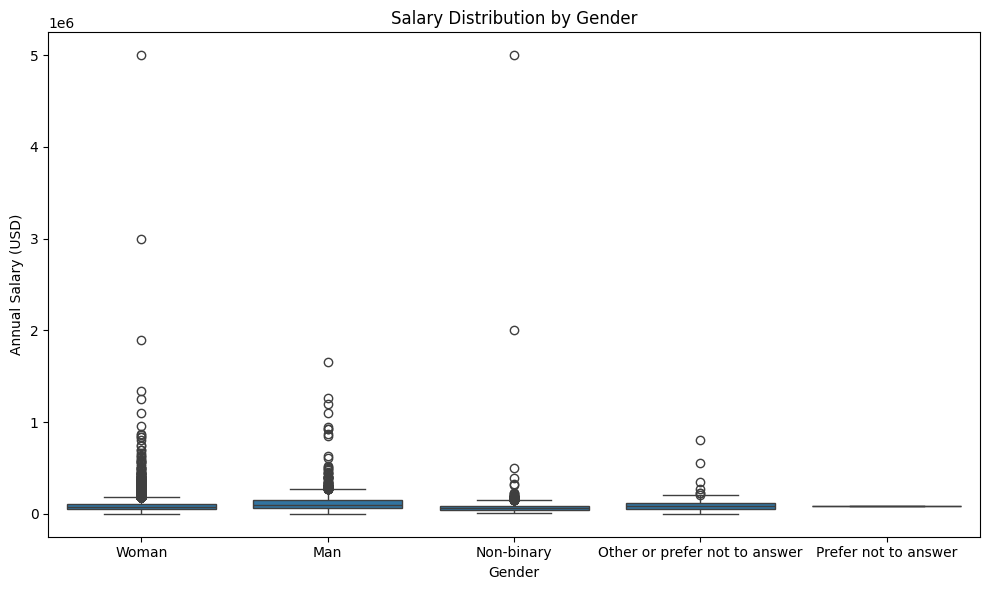

In [15]:
# 4. Gender Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x="Gender", y="Salary", data=df)
plt.title("Salary Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Annual Salary (USD)")
plt.tight_layout()
plt.show()


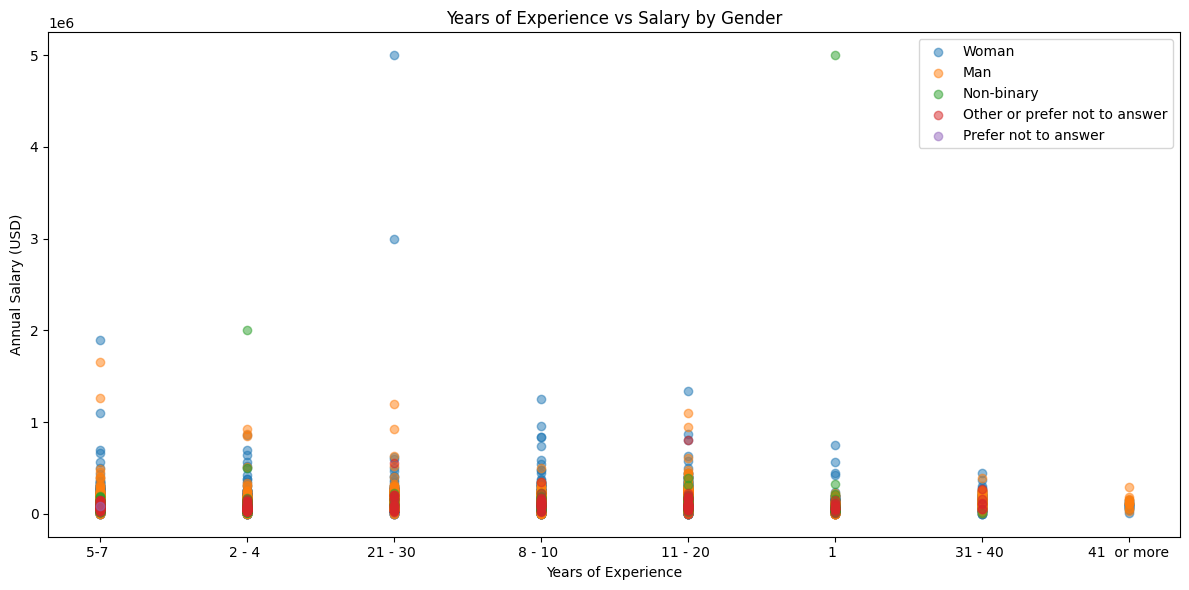

In [16]:
# Experience and Gender Combined
plt.figure(figsize=(12, 6))
for gender in df["Gender"].unique():
    gender_data = df[df["Gender"] == gender]
    plt.scatter(
        gender_data["Years"],
        gender_data["Salary"],
        alpha=0.5,
        label=gender,
    )
plt.legend()
plt.title("Years of Experience vs Salary by Gender")
plt.xlabel("Years of Experience")
plt.ylabel("Annual Salary (USD)")
plt.tight_layout()
plt.show()

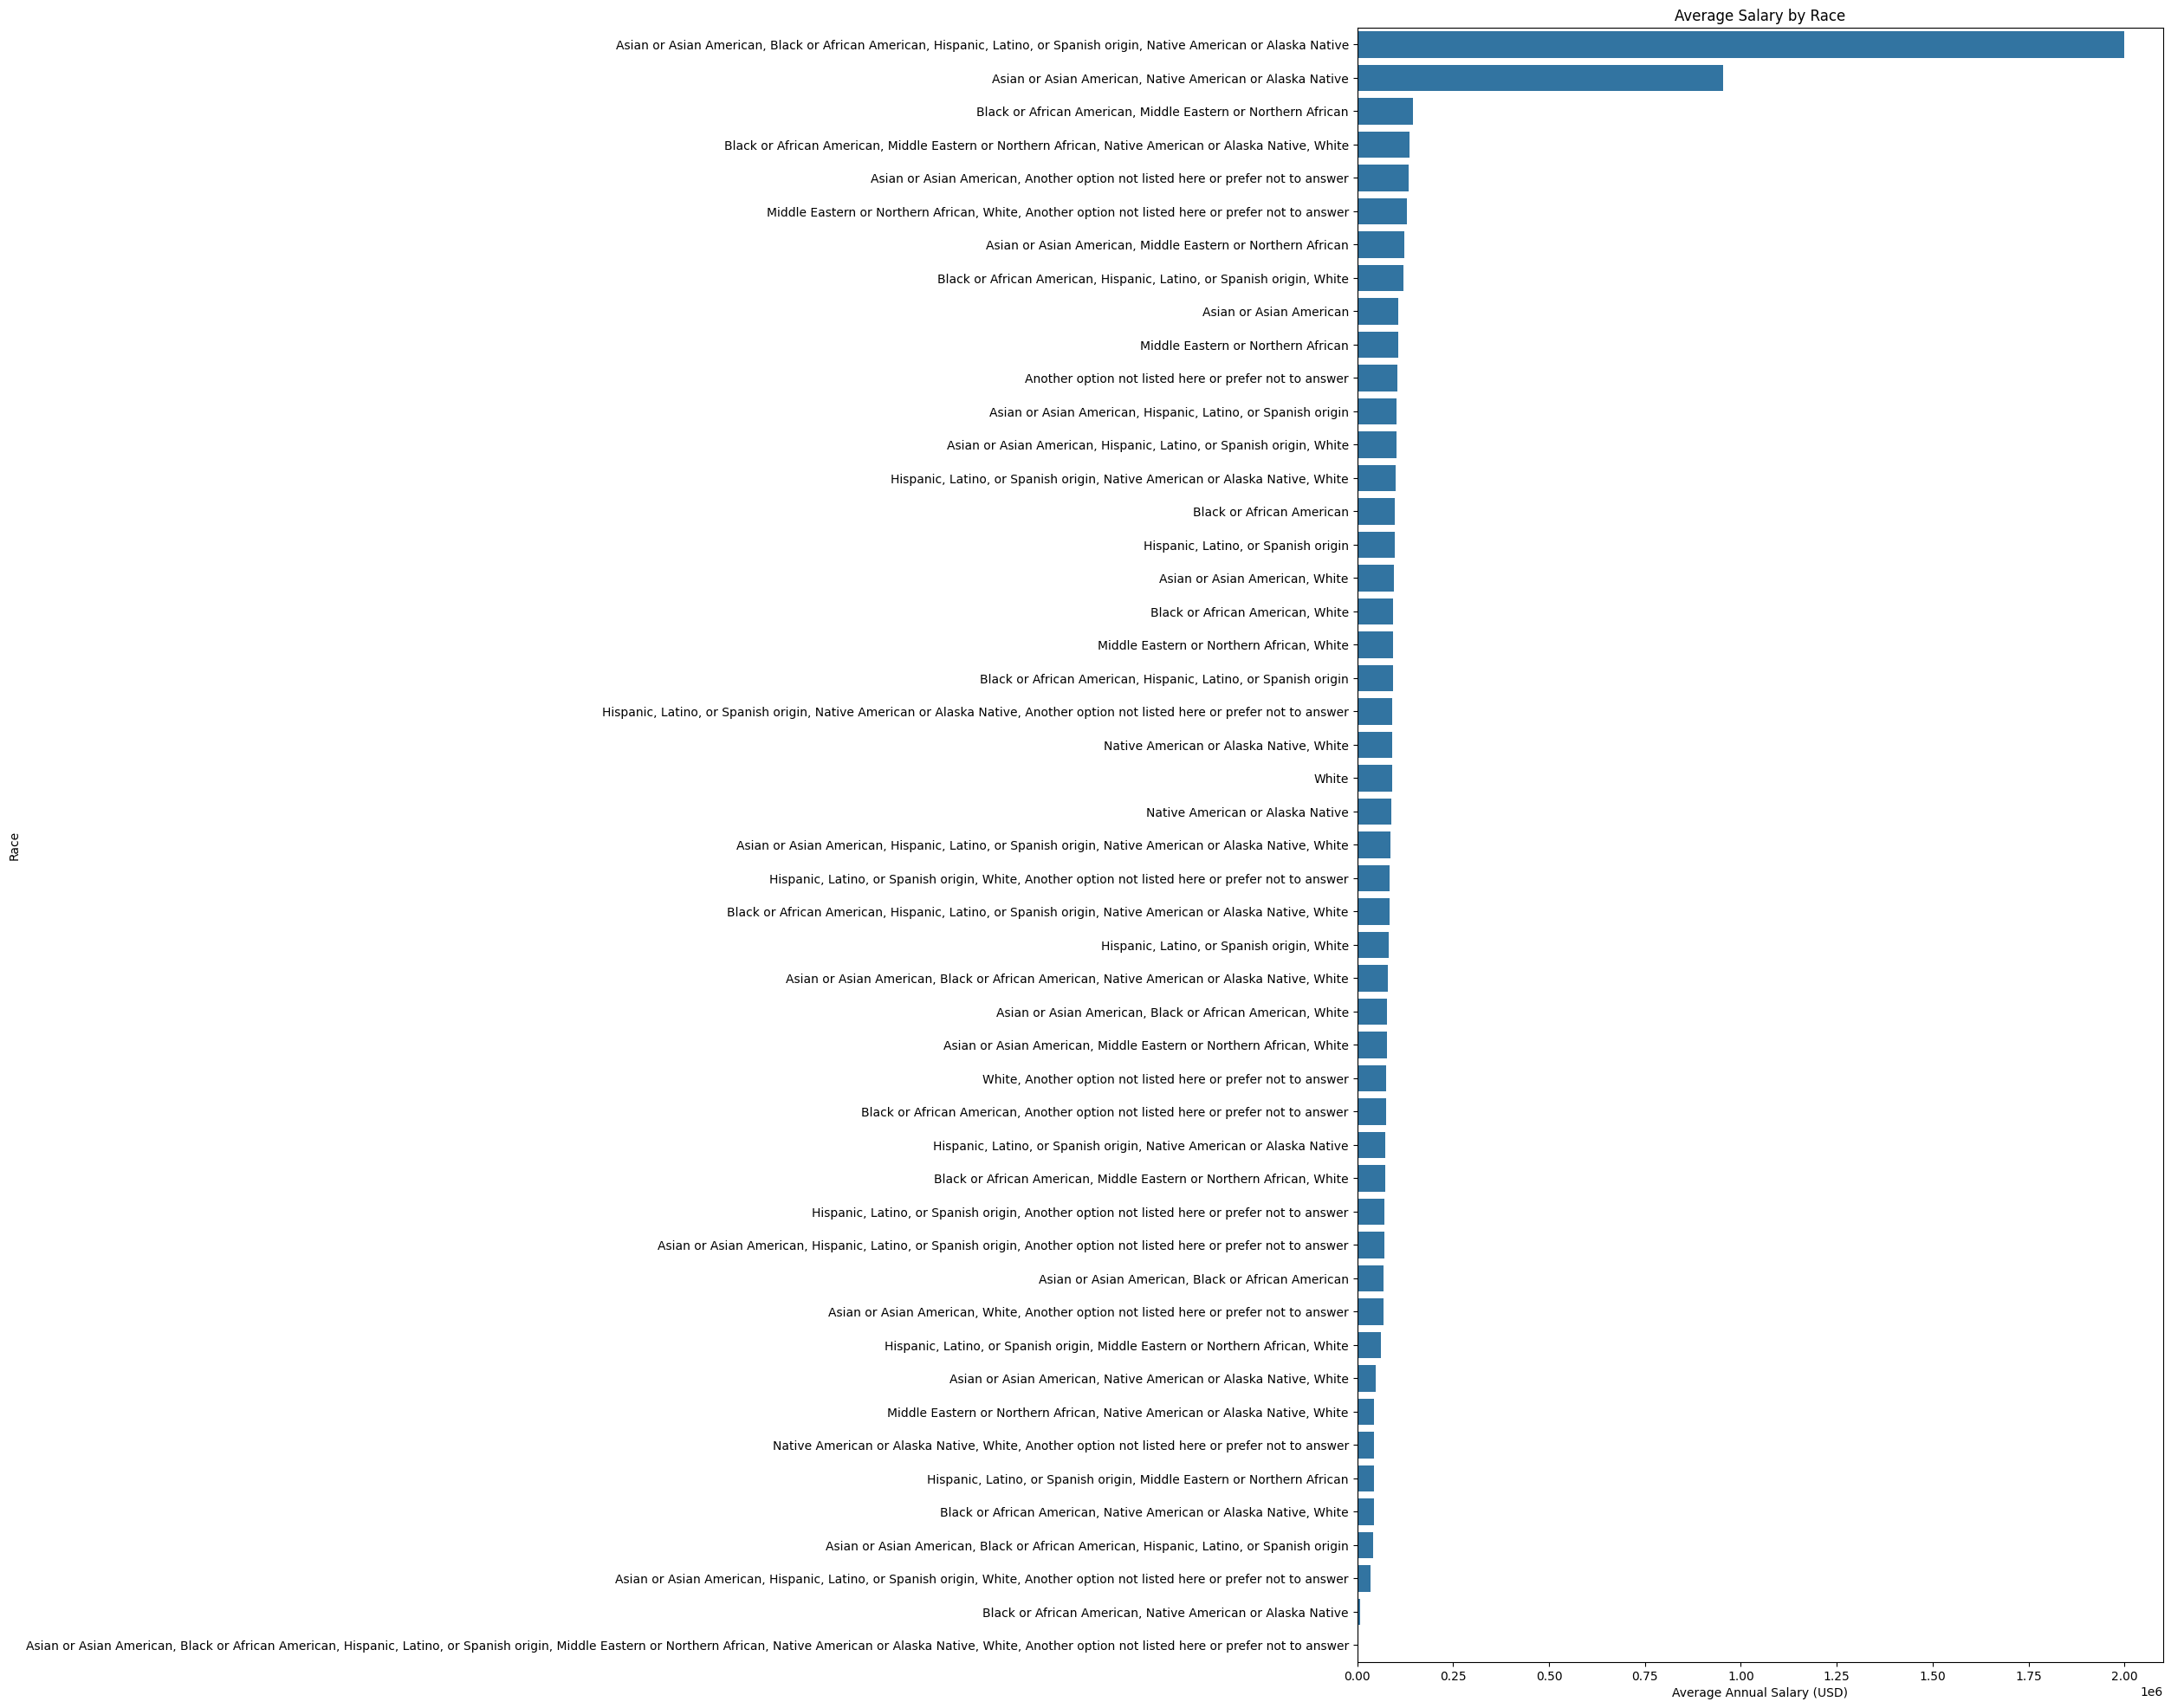

In [17]:
# 5. Race and Education Analysis
# Race Analysis
num_races = df["Race"].nunique()  # Count the number of unique races
plt.figure(figsize=(12, num_races * 0.5))  # Adjust height based on the number of races
race_salary = df.groupby("Race")["Salary"].mean().sort_values(ascending=False)
sns.barplot(x=race_salary.values, y=race_salary.index)
plt.title("Average Salary by Race")
plt.xlabel("Average Annual Salary (USD)")
# plt.tight_layout()
plt.show()

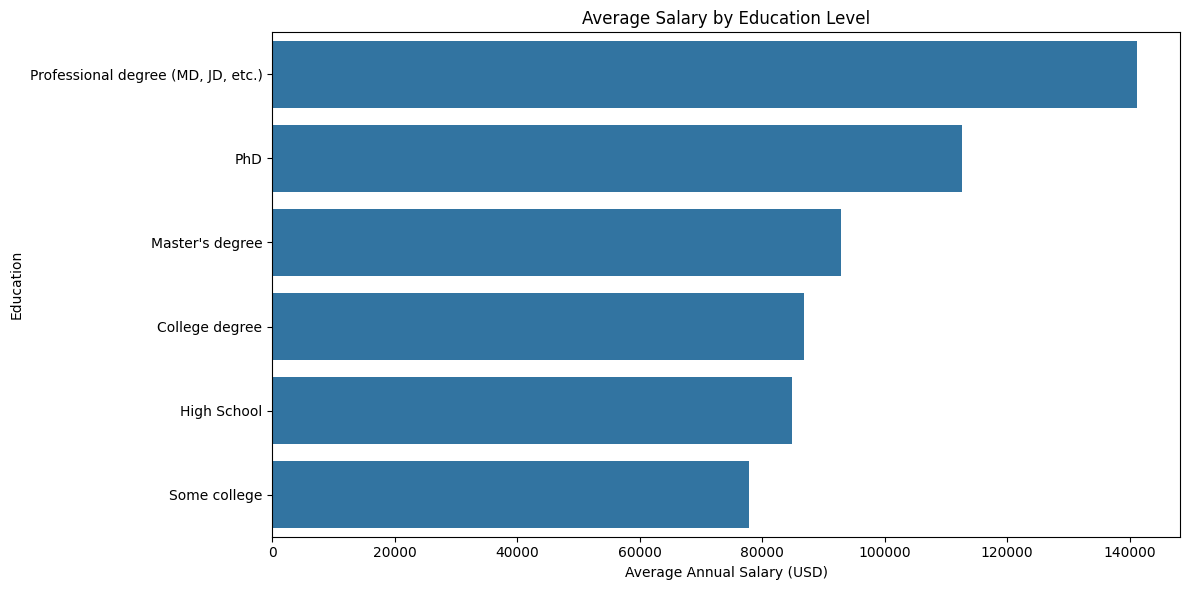

In [18]:
# Education Analysis
plt.figure(figsize=(12, 6))
edu_salary = (
    df.groupby("Education")["Salary"].mean().sort_values(ascending=False)
)
sns.barplot(x=edu_salary.values, y=edu_salary.index)
plt.title("Average Salary by Education Level")
plt.xlabel("Average Annual Salary (USD)")
plt.tight_layout()
plt.show()

- Descriptive Statistics

In [19]:
# Generate summary statistics
summary_stats = {
    "Average Salary": df["Salary"].mean(),
    "Median Salary": df["Salary"].median(),
    "Salary Range": f"{df['Salary'].min():,.0f} - {df['Salary'].max():,.0f}",
    "Most Common Industry": df["Industry"].mode()[0],
    #"Average Years of Experience": df["Years"].mean(),
}

print("\nSummary Statistics:")
for key, value in summary_stats.items():
    if isinstance(value, float):
        print(f"{key}: ${value:,.2f}")
    else:
        print(f"{key}: {value}")


Summary Statistics:
Average Salary: $92,023.46
Median Salary: $78,000.00
Salary Range: 0 - 5,000,044
Most Common Industry: Computing or Tech


In [20]:
# Drop any rows with 1 value in 'Years' column
df = df[df['Years'].str.count('-') > 0]

# Function to calculate mean of year ranges
def calculate_mean_years(year_range):
    start_year, end_year = map(int, year_range.split('-'))
    return (start_year + end_year) / 2

# Applying the function to the 'Years' column
df['Mean_Years'] = df['Years'].apply(calculate_mean_years)
series_years = df['Mean_Years']
print(series_years)

0         6.0
2         3.0
3         6.0
4         6.0
5         3.0
         ... 
28091    15.5
28092     3.0
28095     6.0
28097     6.0
28099     9.0
Name: Mean_Years, Length: 21422, dtype: float64
